In [1]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/LPP/src

Mounted at /content/drive
/content/drive/My Drive/LPP/src


In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import re
import sklearn
from statistics import mean 
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split,  RepeatedKFold, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, RidgeCV, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import operator
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline

In [55]:
def print_evaluate(true, predicted):  
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    return r2_square

def simple_reg_plot(x_data, y_data, title_name, x_axis_label, y_axis_label):

    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title(title_name)
 
    ax = sns.regplot(x=x_data, y=y_data)
 
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
    # plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    # plt.close()
    plt.show()

def nmse_models(pipelines, X_train, y_train):
  results = []
  names = []
  for name, model in pipelines:
    kfold = KFold(n_splits=5, shuffle=True, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [4]:
df = pd.read_csv("../preprocessed_data/df2.csv")

In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
prices = df['price']

In [7]:
df.drop(["price"],axis=1,inplace=True)

In [8]:
df['price'] = prices

In [9]:
df

,cpu_cores,cpu_threads,cpu_basespeed,cpu_turbospeed,gpu_basespeed,gpu_turbospeed,pixel_shaders,gpu_memory,memory_speed,ram,weight,inch,resolution,ssd,price
0,2.0,2.0,1.1,2.6,0.300,0.700,12.0,0.0,0.0,2.0,0.98,11.6,1.049088,32.0,158.0
1,2.0,2.0,1.1,2.6,0.300,0.700,12.0,0.0,0.0,4.0,1.18,11.6,1.049088,32.0,252.0
2,2.0,2.0,1.1,2.6,0.300,0.700,12.0,0.0,0.0,4.0,1.07,11.6,1.049088,32.0,263.0
3,2.0,2.0,1.1,2.6,0.300,0.700,12.0,0.0,0.0,4.0,1.18,11.6,1.049088,16.0,269.0
4,2.0,2.0,1.1,2.6,0.300,0.700,12.0,0.0,0.0,4.0,1.46,14.0,1.049088,32.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,8.0,16.0,2.3,4.8,1.300,1.300,1536.0,8.0,12.0,16.0,2.00,16.0,5.898240,1000.0,2849.0
3914,4.0,8.0,2.8,3.7,1.038,1.197,640.0,4.0,5.0,32.0,2.74,15.6,2.073600,1000.0,2700.0
3915,4.0,8.0,2.2,3.2,0.850,0.850,768.0,2.0,4.0,8.0,2.98,14.0,1.440000,256.0,2999.0
3916,2.0,4.0,1.2,2.9,0.100,0.900,24.0,0.0,0.0,8.0,1.19,13.3,5.760000,512.0,769.0


In [10]:
column_names = df.columns
column_names

Index(['cpu_cores', 'cpu_threads', 'cpu_basespeed', 'cpu_turbospeed',
       'gpu_basespeed', 'gpu_turbospeed', 'pixel_shaders', 'gpu_memory',
       'memory_speed', 'ram', 'weight', 'inch', 'resolution', 'ssd', 'price'],
      dtype='object')

In [11]:
laptop_correlation = df.corr()
laptop_correlation.style.background_gradient()

,cpu_cores,cpu_threads,cpu_basespeed,cpu_turbospeed,gpu_basespeed,gpu_turbospeed,pixel_shaders,gpu_memory,memory_speed,ram,weight,inch,resolution,ssd,price
cpu_cores,1.000000,0.967204,0.472091,0.783367,0.552188,0.613578,0.781856,0.757201,0.796678,0.494339,0.453953,0.470718,0.243381,0.428716,0.661709
cpu_threads,0.967204,1.000000,0.503220,0.848322,0.532356,0.672311,0.765066,0.747987,0.789709,0.527192,0.485151,0.530401,0.278029,0.455287,0.715148
cpu_basespeed,0.472091,0.503220,1.000000,0.510572,0.545992,0.408832,0.613665,0.597743,0.594422,0.353763,0.510659,0.403970,0.259212,0.259497,0.595487
cpu_turbospeed,0.783367,0.848322,0.510572,1.000000,0.533194,0.713762,0.667320,0.664528,0.696894,0.533774,0.474244,0.557877,0.315766,0.406139,0.705836
gpu_basespeed,0.552188,0.532356,0.545992,0.533194,1.000000,0.682365,0.600030,0.670380,0.706657,0.343212,0.486906,0.427313,0.255548,0.258271,0.428153
gpu_turbospeed,0.613578,0.672311,0.408832,0.713762,0.682365,1.000000,0.462976,0.549260,0.587778,0.398937,0.498894,0.529439,0.294639,0.327365,0.543438
pixel_shaders,0.781856,0.765066,0.613665,0.667320,0.600030,0.462976,1.000000,0.937176,0.921087,0.486496,0.513850,0.456198,0.229689,0.322956,0.657406
gpu_memory,0.757201,0.747987,0.597743,0.664528,0.670380,0.549260,0.937176,1.000000,0.923447,0.484874,0.572530,0.482009,0.277493,0.328121,0.687667
memory_speed,0.796678,0.789709,0.594422,0.696894,0.706657,0.587778,0.921087,0.923447,1.000000,0.506082,0.528296,0.474173,0.258595,0.368692,0.652359
ram,0.494339,0.527192,0.353763,0.533774,0.343212,0.398937,0.486496,0.484874,0.506082,1.000000,0.405726,0.406883,0.197758,0.318738,0.589189


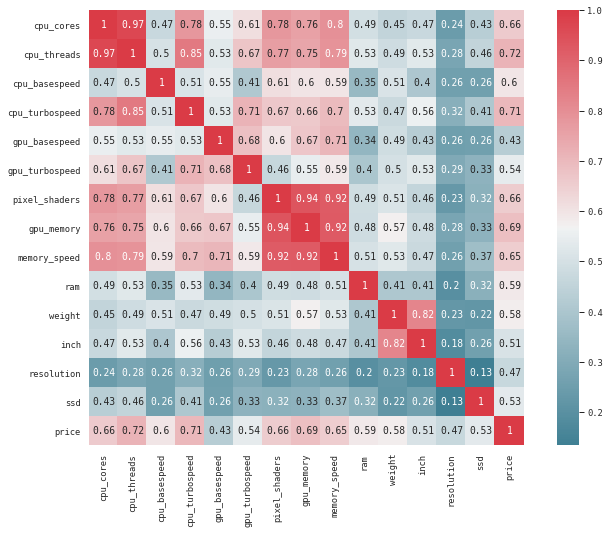

In [12]:
sns.set(context="paper",font="monospace")
fig, axe = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
sns.heatmap(laptop_correlation,vmax=1,square =True, cmap=cmap,annot=True );

In [13]:
y = df["price"]
del df["price"]
X = df

In [14]:
mm = MinMaxScaler(feature_range=(0,1))

In [15]:
Xmm = mm.fit_transform(X)

In [16]:
Xmm

array([[0.        , 0.        , 0.10714286, ..., 0.21917808, 0.0030625 ,
        0.00387548],
       [0.        , 0.        , 0.10714286, ..., 0.21917808, 0.0030625 ,
        0.00387548],
       [0.        , 0.        , 0.10714286, ..., 0.21917808, 0.0030625 ,
        0.00387548],
       ...,
       [0.33333333, 0.42857143, 0.5       , ..., 0.54794521, 0.05078125,
        0.03187898],
       [0.        , 0.14285714, 0.14285714, ..., 0.45205479, 0.578125  ,
        0.06388299],
       [0.        , 0.14285714, 0.        , ..., 0.45205479, 0.128125  ,
        0.03187898]])

In [17]:
number_of_features = len(X.columns)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

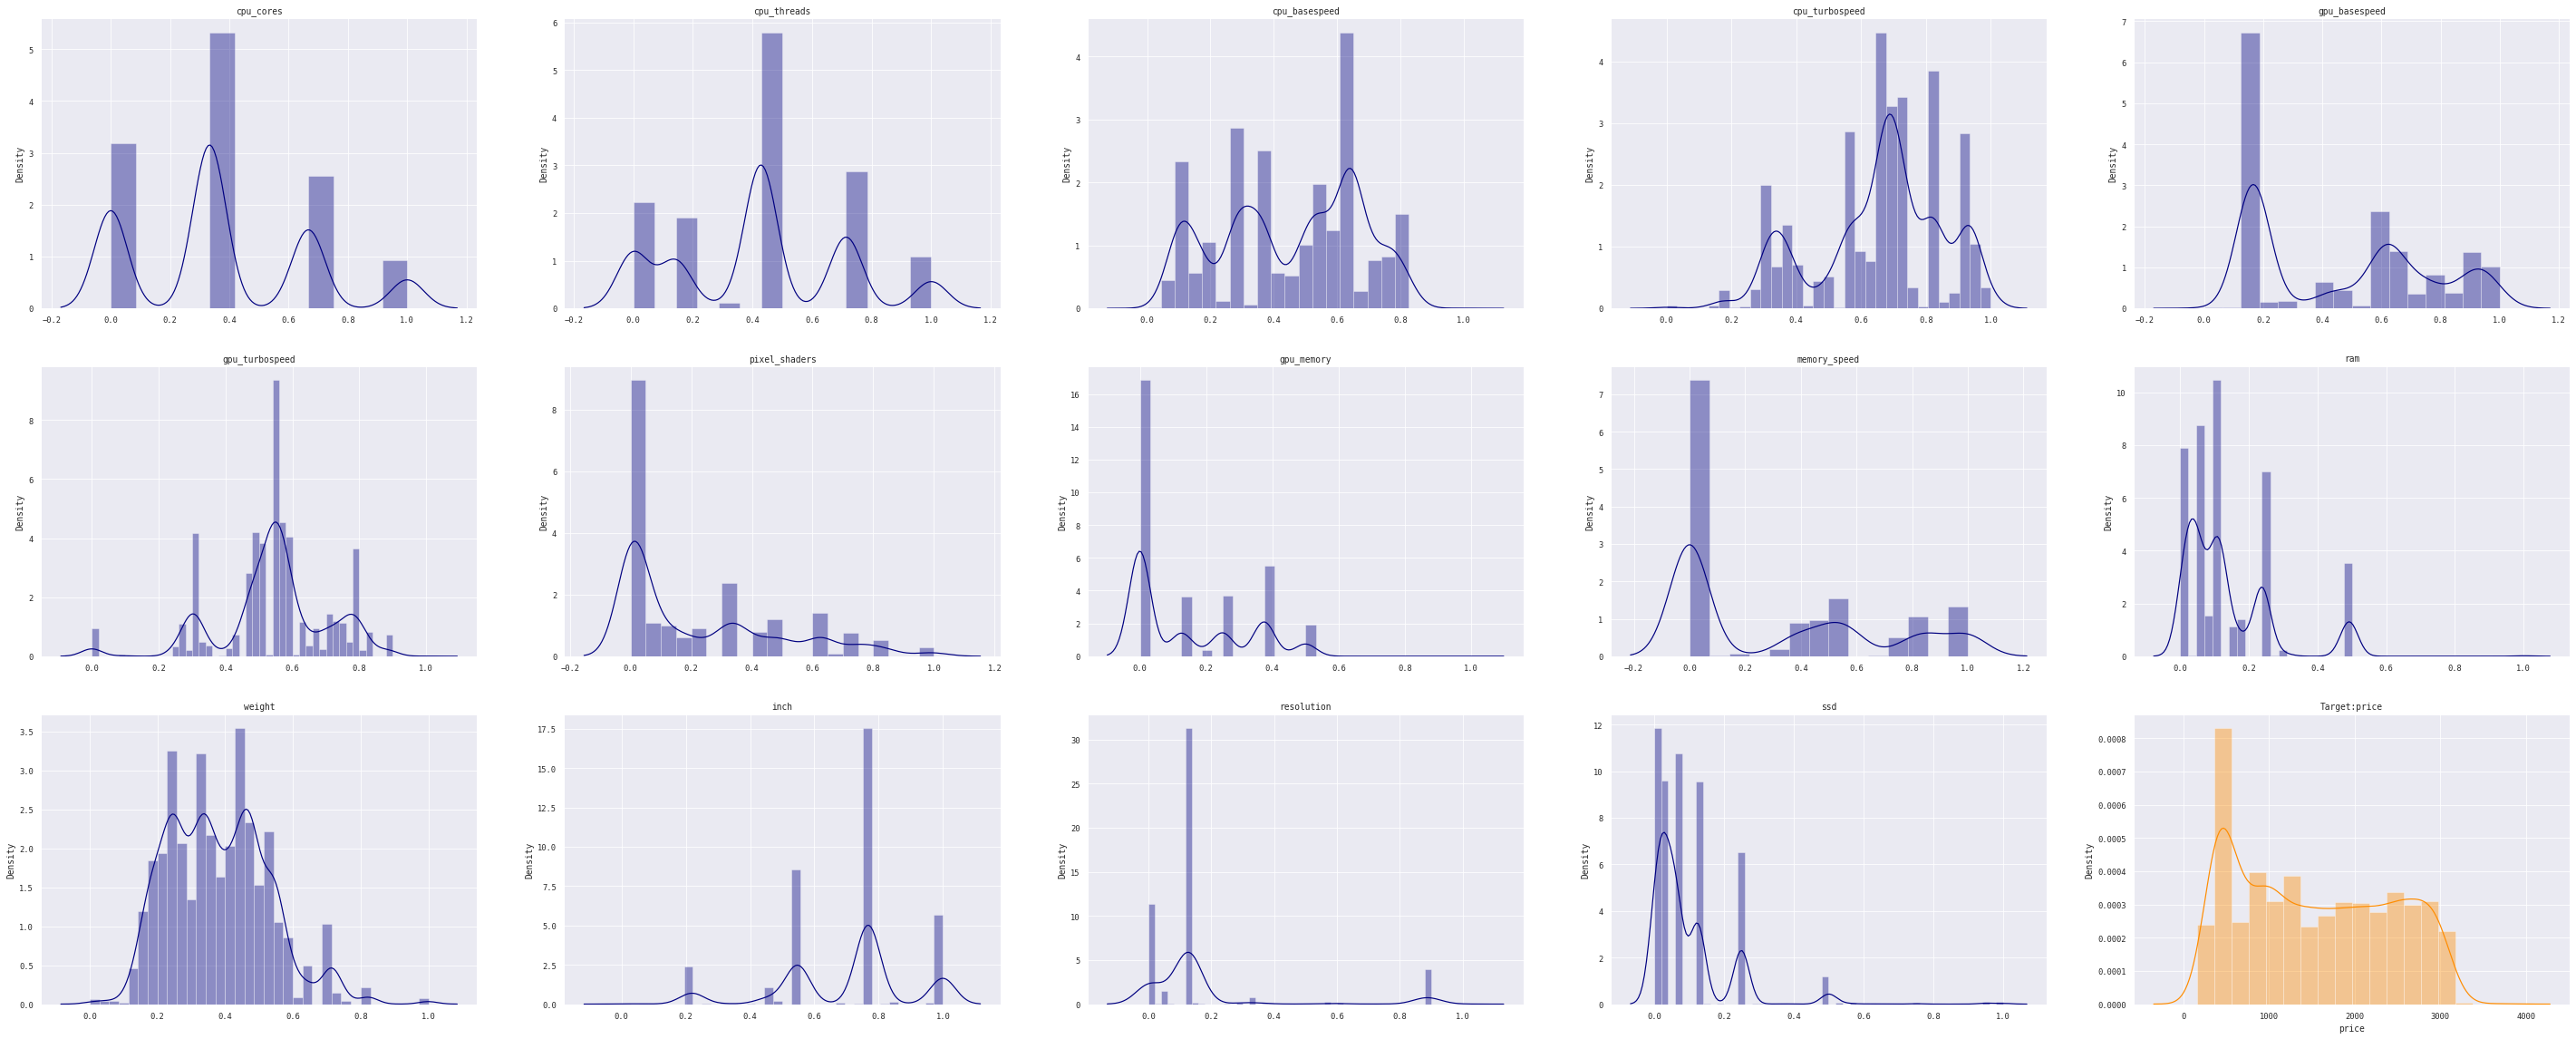

In [18]:
fig = plt.figure(figsize=(50, 20))
fig.subplots(number_of_features//5+1, ncols=5)
for feat_i in range(number_of_features): 
    ax = plt.subplot(number_of_features//5+1,5, feat_i+1)
    plt.title(column_names[feat_i]) 
    sns.distplot(Xmm[:,feat_i], color = "navy")
    
ax = plt.subplot(number_of_features//5+1,5, feat_i+2)
plt.title("Target:" + column_names[-1]) 
sns.distplot(y, color = "darkorange")
plt.show()

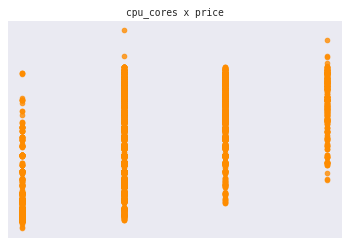

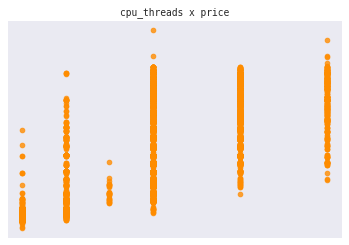

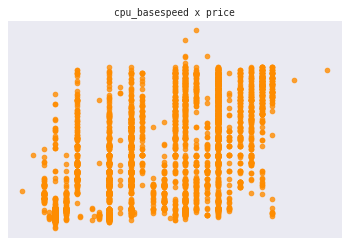

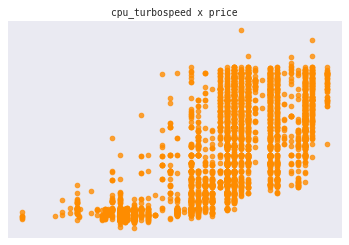

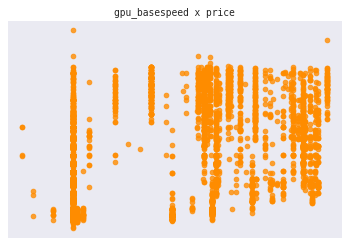

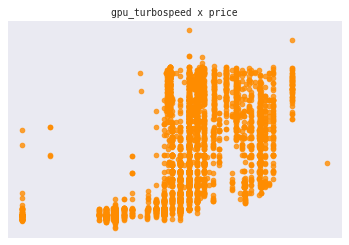

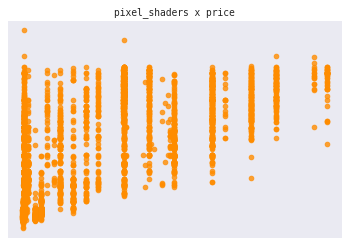

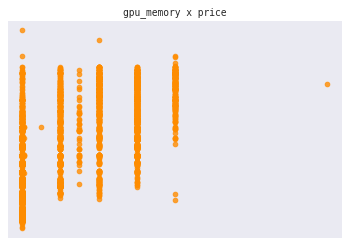

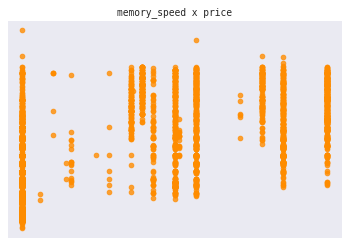

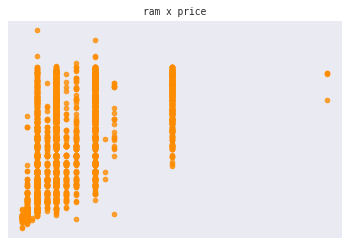

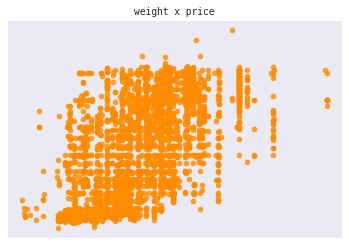

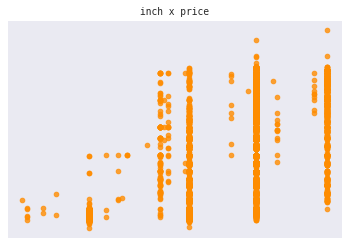

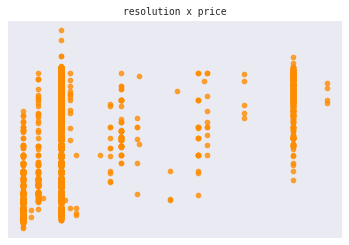

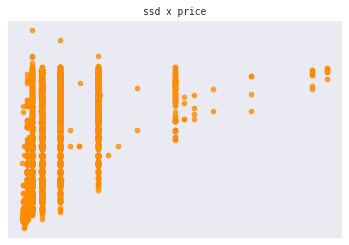

In [19]:
for feat_i in range(0, number_of_features): 
    plt.figure()
    plt.scatter(Xmm[:,feat_i], y,  alpha=.8, color="darkorange") 
    plt.xticks(())
    plt.yticks(())
    ax.axis('equal')
    plt.title(column_names[feat_i] + " x " + column_names[-1])
    plt.show()

PCA за обете множества добиени со MinMax и Стандардно скалирање

In [21]:
pca = PCA()

In [28]:
ss = StandardScaler()

In [29]:
X_reduced = pca.fit_transform(ss.fit_transform(X))

In [30]:
X_reduced

array([[-4.60530652e+00,  1.53376943e+00, -7.62079677e-01, ...,
        -5.37656973e-02,  6.33843330e-03,  1.11680466e-02],
       [-4.49491264e+00,  1.33271683e+00, -7.35542252e-01, ...,
        -8.72182816e-02, -2.60569051e-02,  6.95200463e-04],
       [-4.54137448e+00,  1.44401773e+00, -7.32787692e-01, ...,
        -6.72113624e-02, -8.20772503e-03,  6.88021263e-03],
       ...,
       [-5.27226178e-01, -6.50661326e-01, -1.20894283e+00, ...,
        -2.07806797e-01, -1.91727376e-01, -3.59505236e-01],
       [-3.38551996e+00,  5.51516740e-01,  5.20312571e-01, ...,
        -6.32700798e-02, -2.50669359e-02, -1.56349406e-01],
       [-4.16699068e+00,  7.10242630e-01,  6.06752658e-02, ...,
        -6.41453884e-03, -3.15296651e-02, -3.13202588e-01]])

In [31]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 56.34,  64.33,  71.24,  77.82,  82.97,  87.84,  91.92,  95.22,
        96.76,  98.1 ,  99.03,  99.53,  99.87, 100.02])

In [32]:
X_reduced = pca.fit_transform(mm.fit_transform(X))

In [33]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([65.12, 72.79, 79.44, 84.93, 89.53, 92.73, 94.52, 95.97, 97.31,
       98.25, 98.99, 99.51, 99.77, 99.99])

In [36]:
# train/test поделба со користење на скалираното множество во стандарден скалер
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, 
    y, 
    train_size=0.8,
    test_size=0.2, 
    random_state=0
    )

In [158]:
# train/test поделба со користење на првичното предпроцесирано множество
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, 
    y, 
    train_size=0.8,
    test_size=0.2, 
    random_state=0
    )

Linear Regression

In [38]:
lr = LinearRegression()

In [40]:
lr_folds = KFold(n_splits=10, shuffle=True, random_state=100)
lr_val_scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=lr_folds)

In [41]:
lr_pred = cross_val_predict(lr, X_test, y_test, cv=lr_folds)

In [42]:
lr_score = print_evaluate(y_test, lr_pred)

MAE: 312.2179042062339
MSE: 176900.77811474414
RMSE: 420.5957419122834
R2 Square 0.7765839396619749


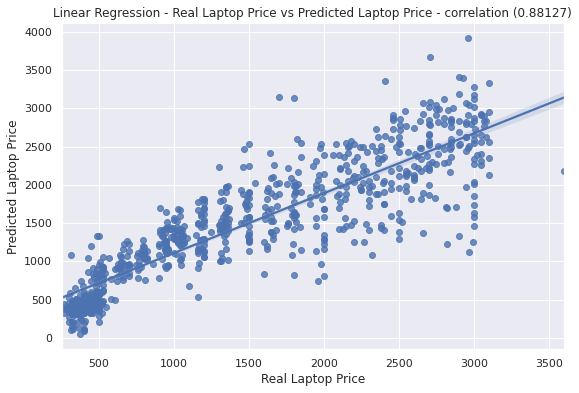

In [43]:
correlation_lr = round(pearsonr(lr_pred, y_test_1)[0], 5)
title_name = "Linear Regression - Real Laptop Price vs Predicted Laptop Price - correlation ({})".format(correlation_lr)
x_axis_label = "Real Laptop Price"
y_axis_label = "Predicted Laptop Price"
simple_reg_plot(y_test_1, lr_pred, title_name, x_axis_label, y_axis_label)

Random Forest Regressor

In [216]:
m = RandomForestRegressor()

In [217]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(10, 200, 10)
}

grid_search = GridSearchCV(estimator = m, param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 2)

In [218]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 2052 candidates, totalling 10260 fits
[CV] bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.0s
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140 
[CV]  bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140 
[CV]  bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140 
[CV]  bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140 
[CV]  bootstrap=True, max_depth=110, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=140, total=   0.5s
[

[Parallel(n_jobs=1)]: Done 10260 out of 10260 | elapsed: 77.0min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 190}

In [219]:
best_rf_model = grid_search.best_estimator_

In [220]:
rf_predictions = best_rf_model.predict(X_test)

In [221]:
forest_score = print_evaluate(y_test, rf_predictions)

MAE: 210.5094214291956
MSE: 101679.0001931414
RMSE: 318.871447754642
R2 Square 0.8715849535295652


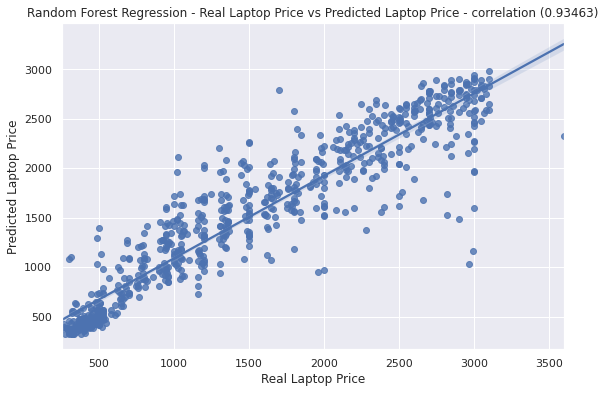

In [223]:
correlation = round(pearsonr(rf_predictions, y_test)[0], 5)
title_name = "Random Forest Regression - Real Laptop Price vs Predicted Laptop Price - correlation ({})".format(correlation)
x_axis_label = "Real Laptop Price"
y_axis_label = "Predicted Laptop Price"
simple_reg_plot(y_test, rf_predictions, title_name, x_axis_label, y_axis_label)

Random Forest Regressor with PCA

In [225]:
m1 = RandomForestRegressor()

In [227]:
estimators = np.arange(10, 200, 10)
val_scores = []
for n in estimators:
    m.set_params(n_estimators=n)
    # model.fit(X_train, Y_train)
    folds = KFold(n_splits=5, shuffle=True, random_state=100)
    val_scores.append(cross_val_score(m1, X_train_1, y_train_1, scoring='r2', cv=folds))
    # scores.append(model.score(X_test, Y_test))

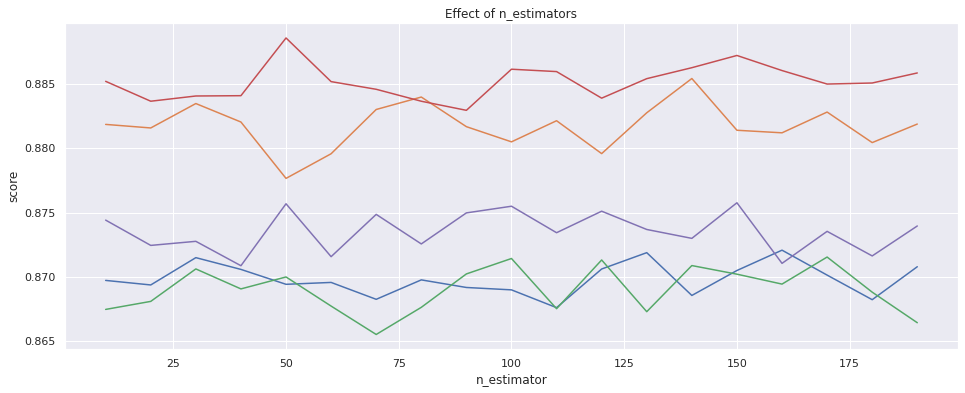

In [228]:
plt.figure(figsize=(16,6))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, val_scores)

In [229]:
estimators_results = {}
for i in range(0, len(val_scores)):
  #print("Estimator: {} Split Scores: {} Mean: {}".format(estimators[i], val_scores[i], mean(val_scores[i])))
  estimators_results[estimators[i]] = (val_scores[i], mean(val_scores[i]))

In [230]:
best_estimator = sorted(estimators_results.items(), key=lambda item: item[1][1], reverse=True)[0][0]

In [231]:
best_estimator

150

In [232]:
len(X_train_1.columns)

14

In [233]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 15))}]

model = RandomForestRegressor(n_estimators=best_estimator)
model.fit(X_train_1, y_train_1)
rfe = RFE(model)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_1, y_train_1)  

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  8.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=RandomForestRegressor(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           criterion='mse',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                     

In [234]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.213131,0.222686,0.012226,0.000310,1,{'n_features_to_select': 1},0.498271,0.560599,0.517779,0.593440,0.583312,0.550680,0.036935,14,0.534498,0.568981,0.581696,0.562234,0.565149,0.562511,0.015503
1,11.084608,0.202124,0.015897,0.000839,2,{'n_features_to_select': 2},0.701666,0.729096,0.694164,0.753686,0.727447,0.721212,0.021304,13,0.747074,0.738358,0.750022,0.742676,0.748528,0.745332,0.004264
2,10.829066,0.192680,0.020317,0.002970,3,{'n_features_to_select': 3},0.714134,0.796826,0.755716,0.803228,0.786998,0.771380,0.032949,12,0.747805,0.865747,0.822961,0.836266,0.898392,0.834234,0.050419
3,10.393738,0.186723,0.022694,0.001507,4,{'n_features_to_select': 4},0.760375,0.830492,0.795526,0.823443,0.787988,0.799565,0.025349,11,0.874947,0.933907,0.909762,0.857454,0.863921,0.887998,0.029204
4,9.912024,0.098275,0.025103,0.001564,5,{'n_features_to_select': 5},0.791473,0.855200,0.794469,0.866305,0.804344,0.822358,0.031831,10,0.911070,0.955634,0.910472,0.952074,0.942896,0.934429,0.019760
5,9.317105,0.117421,0.027255,0.000664,6,{'n_features_to_select': 6},0.842986,0.863004,0.849131,0.876131,0.834754,0.853201,0.014718,9,0.959563,0.971531,0.957665,0.955553,0.972958,0.963454,0.007303
6,8.507615,0.053248,0.027960,0.000547,7,{'n_features_to_select': 7},0.853222,0.868901,0.850592,0.876003,0.850149,0.859774,0.010645,8,0.973375,0.971285,0.972422,0.956012,0.973037,0.969226,0.006645
7,7.633064,0.035464,0.028263,0.000999,8,{'n_features_to_select': 8},0.858750,0.869768,0.851610,0.870299,0.851690,0.860423,0.008265,7,0.973571,0.972103,0.972528,0.971708,0.973987,0.972780,0.000866
8,6.728487,0.042533,0.028655,0.000482,9,{'n_features_to_select': 9},0.862258,0.876645,0.854483,0.879062,0.865108,0.867511,0.009165,6,0.973800,0.974101,0.973640,0.972894,0.974060,0.973699,0.000437
9,5.687223,0.027324,0.028263,0.000623,10,{'n_features_to_select': 10},0.865423,0.877711,0.868726,0.884988,0.875992,0.874568,0.006903,5,0.976360,0.974121,0.975796,0.975188,0.975905,0.975474,0.000773


In [235]:
cv_results.sort_values(by=['mean_train_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
13,1.240055,0.008653,0.028272,0.000392,14,{'n_features_to_select': 14},0.871016,0.880708,0.870524,0.885669,0.874914,0.876566,0.005832,1,0.976762,0.974742,0.976350,0.975746,0.975981,0.975916,0.000680
12,2.436337,0.010000,0.028472,0.000749,13,{'n_features_to_select': 13},0.871674,0.881134,0.869738,0.884271,0.871845,0.875732,0.005824,3,0.976549,0.974310,0.976361,0.975705,0.976196,0.975824,0.000807
11,3.568495,0.025604,0.028415,0.000101,12,{'n_features_to_select': 12},0.868849,0.879205,0.869035,0.887309,0.874603,0.875800,0.006922,2,0.975880,0.974238,0.976474,0.975329,0.975731,0.975530,0.000743
9,5.687223,0.027324,0.028263,0.000623,10,{'n_features_to_select': 10},0.865423,0.877711,0.868726,0.884988,0.875992,0.874568,0.006903,5,0.976360,0.974121,0.975796,0.975188,0.975905,0.975474,0.000773
10,4.697493,0.023192,0.028216,0.000616,11,{'n_features_to_select': 11},0.868354,0.878304,0.869578,0.886403,0.874756,0.875479,0.006533,4,0.976095,0.974308,0.975926,0.975259,0.975437,0.975405,0.000628
8,6.728487,0.042533,0.028655,0.000482,9,{'n_features_to_select': 9},0.862258,0.876645,0.854483,0.879062,0.865108,0.867511,0.009165,6,0.973800,0.974101,0.973640,0.972894,0.974060,0.973699,0.000437
7,7.633064,0.035464,0.028263,0.000999,8,{'n_features_to_select': 8},0.858750,0.869768,0.851610,0.870299,0.851690,0.860423,0.008265,7,0.973571,0.972103,0.972528,0.971708,0.973987,0.972780,0.000866
6,8.507615,0.053248,0.027960,0.000547,7,{'n_features_to_select': 7},0.853222,0.868901,0.850592,0.876003,0.850149,0.859774,0.010645,8,0.973375,0.971285,0.972422,0.956012,0.973037,0.969226,0.006645
5,9.317105,0.117421,0.027255,0.000664,6,{'n_features_to_select': 6},0.842986,0.863004,0.849131,0.876131,0.834754,0.853201,0.014718,9,0.959563,0.971531,0.957665,0.955553,0.972958,0.963454,0.007303
4,9.912024,0.098275,0.025103,0.001564,5,{'n_features_to_select': 5},0.791473,0.855200,0.794469,0.866305,0.804344,0.822358,0.031831,10,0.911070,0.955634,0.910472,0.952074,0.942896,0.934429,0.019760


In [236]:
n_optimal_f = list(cv_results.param_n_features_to_select)[0]

In [238]:
n_features_optimal = n_optimal_f

model = RandomForestRegressor(n_estimators=best_estimator)
model.fit(X_train_1, y_train_1)

rfe = RFE(model, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_1, y_train_1)

y_pred = model.predict(X_test_1)

In [241]:
forest_score_pca = print_evaluate(y_test_1, y_pred)

MAE: 191.68640562674528
MSE: 92169.58431810589
RMSE: 303.59444052568864
R2 Square 0.883594828520269


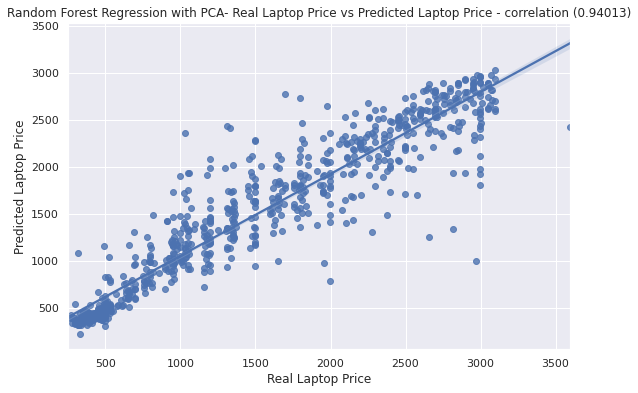

In [240]:
correlation = round(pearsonr(y_pred, y_test_1)[0], 5)
 
title_name = "Random Forest Regression with PCA- Real Laptop Price vs Predicted Laptop Price - correlation ({})".format(correlation)
x_axis_label = "Real Laptop Price"
y_axis_label = "Predicted Laptop Price"
 
simple_reg_plot(y_test_1, y_pred, title_name, x_axis_label, y_axis_label)

Барање на соодветен модел

In [57]:
pipelines = []
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

In [58]:
nmse_models(pipelines, X_train_1, y_train_1)

ScaledEN: -192281.965233 (11973.337485)
ScaledCART: -168962.687241 (11983.183979)
ScaledGBM: -109903.236804 (7667.821009)


ELASTIC NET

In [59]:
 pca = PCA()
 elasticnet = ElasticNet()

In [60]:
 pipe = Pipeline(steps=[('stc_slc', ss),
                           ('pca', pca),
                           ('elasticnet', elasticnet)])

In [61]:
n_components = list(range(1,X.shape[1]+1,1))

In [63]:
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

In [66]:
parameters = dict(pca__n_components=n_components,
                      elasticnet__alpha=alpha,
                      elasticnet__l1_ratio=l1_ratio)

In [67]:
clf_EN = GridSearchCV(pipe, parameters)
clf_EN.fit(X_train_1, y_train_1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359996355.3086081, tolerance: 191390.9654042281
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350675195.8903164, tolerance: 192158.556362026

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('stc_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter

In [68]:
print('Best Number Of Components:', clf_EN.best_estimator_.get_params()['pca__n_components'])
print(clf_EN.best_estimator_.get_params()['elasticnet'])

Best Number Of Components: 14
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.21,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [69]:
best_elastic_net = clf_EN.best_estimator_

In [70]:
elastic_net_predistions = best_elastic_net.predict(X_test_1)

In [71]:
enet_score = print_evaluate(y_test_1, elastic_net_predistions)

MAE: 312.09429645664915
MSE: 171934.49268481584
RMSE: 414.6498434641159
R2 Square 0.7828560880215996


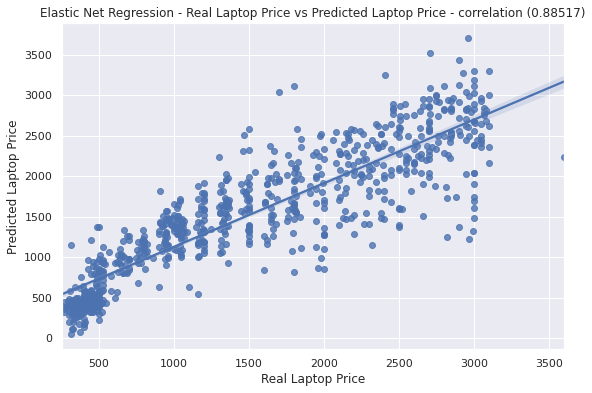

In [72]:
correlation_en = round(pearsonr(elastic_net_predistions, y_test_1)[0], 5)
title_name = "Elastic Net Regression - Real Laptop Price vs Predicted Laptop Price - correlation ({})".format(correlation_en)
x_axis_label = "Real Laptop Price"
y_axis_label = "Predicted Laptop Price"
simple_reg_plot(y_test_1, elastic_net_predistions, title_name, x_axis_label, y_axis_label)

Decision Tree Regressor

In [113]:
drtree = DecisionTreeRegressor()

In [114]:
gs = GridSearchCV(drtree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='r2')

In [115]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             pre_dispatch='2*n_jobs', re

In [118]:
gs.best_params_

{'max_depth': 8, 'min_samples_split': 40}

In [119]:
drtree_pred = gs.predict(X_test)

In [120]:
dt_score = print_evaluate(y_test, drtree_pred)

MAE: 255.17953688226078
MSE: 145273.00650045526
RMSE: 381.1469618145411
R2 Square 0.8165280948355146


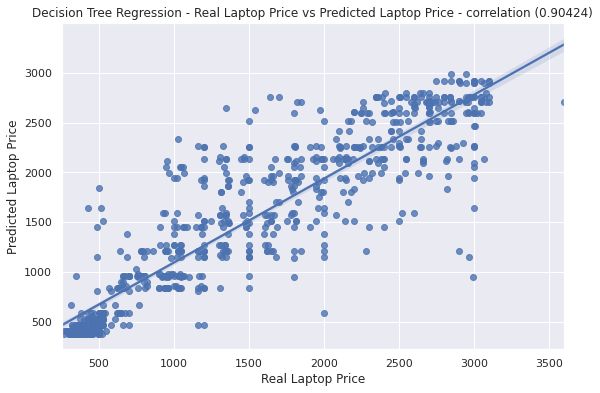

In [121]:
correlation_dt = round(pearsonr(drtree_pred, y_test)[0], 5)
title_name = "Decision Tree Regression - Real Laptop Price vs Predicted Laptop Price - correlation ({})".format(correlation_dt)
x_axis_label = "Real Laptop Price"
y_axis_label = "Predicted Laptop Price"
simple_reg_plot(y_test, drtree_pred, title_name, x_axis_label, y_axis_label)

Gradient Boosting Model

In [210]:
scaler = StandardScaler().fit(X_train_1)
rescaled_X_train = scaler.transform(X_train_1)
rescaled_X_test = scaler.transform(X_test_1)

In [141]:
parameters_2 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters_2, scoring='r2', n_jobs=4,iid=False, cv=5)
tuning.fit(rescaled_X_train, y_train_1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=4,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [142]:
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 1250}, 0.8900679026238418)

In [143]:
parameters_3 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.05,n_estimators=1250, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters_3, scoring='r2',n_jobs=4,iid=False, cv=5)
tuning.fit(rescaled_X_train,y_train_1)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 4}, 0.8900679026238418)

In [144]:
parameters_4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.05, n_estimators=1250, max_depth=4, subsample=1, max_features='sqrt', random_state=10), 
            param_grid = parameters_4, scoring='r2',n_jobs=4,iid=False, cv=5)
tuning.fit(rescaled_X_train,y_train_1)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'min_samples_leaf': 1, 'min_samples_split': 6}, 0.8909685117370032)

In [145]:
parameters_5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.05, n_estimators=1250, max_depth=4, min_samples_split=6, min_samples_leaf=1, subsample=1, random_state=10), 
param_grid = parameters_5, scoring='r2',n_jobs=4,iid=False, cv=5)
tuning.fit(rescaled_X_train,y_train_1)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_features': 3}, 0.8909685117370032)

In [146]:
parameters_6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.05, n_estimators=1250, max_depth=4, min_samples_split=6, min_samples_leaf=1, max_features=3 , random_state=10), 
param_grid = parameters_6, scoring='r2',n_jobs=4,iid=False, cv=5)
tuning.fit(rescaled_X_train,y_train_1)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'subsample': 1}, 0.8909685117370032)

FINAL GBMODEL TUNING

Accuracy of the GBM on test set: 0.906
MAE: 175.85720619655584
MSE: 74492.93426637846
RMSE: 272.9339375496907
R2 Square 0.9059194760239068


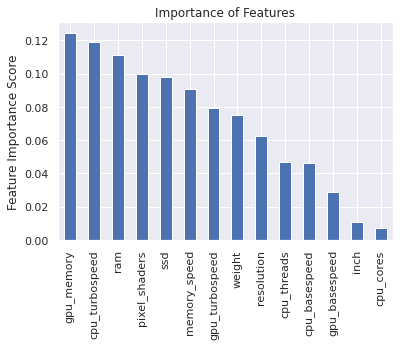

In [212]:
new_GBM = GradientBoostingRegressor(learning_rate=0.05, n_estimators=2000, max_depth=4, min_samples_split=6, min_samples_leaf=1,max_features=3 , subsample=0.8, random_state=10)
new_GBM.fit(rescaled_X_train, y_train_1)
predictors=list(X_train_1)
feat_imp = pd.Series(new_GBM.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new_GBM.score(rescaled_X_test, y_test_1)))
pred=new_GBM.predict(rescaled_X_test)
GBM_score = print_evaluate(y_test_1, pred)

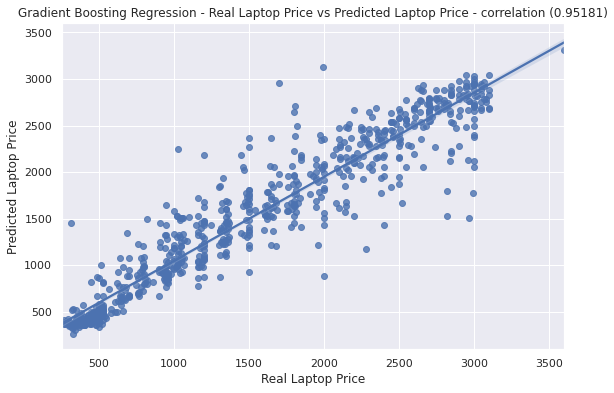

In [213]:
correlation_GBM_final = round(pearsonr(pred, y_test_1)[0], 5)
title_name = "Gradient Boosting Regression - Real Laptop Price vs Predicted Laptop Price - correlation ({})".format(correlation_GBM_final)
x_axis_label = "Real Laptop Price"
y_axis_label = "Predicted Laptop Price"
simple_reg_plot(y_test_1, pred, title_name, x_axis_label, y_axis_label)

In [214]:
for Ytest, Ypred in zip(y_test_1,pred):
    print("Real value {} / Predicted {}".format(Ytest,Ypred))

Real value 649.0 / Predicted 692.7424665665211
Real value 2599.0 / Predicted 2498.379979633156
Real value 1814.0 / Predicted 1806.4178270687555
Real value 799.0 / Predicted 794.7178147320534
Real value 2379.0 / Predicted 2342.653741911855
Real value 2509.0 / Predicted 2356.6772540399866
Real value 2399.0 / Predicted 2412.91975338882
Real value 2699.0 / Predicted 2743.7718034162904
Real value 529.0 / Predicted 460.9382798789266
Real value 2839.0 / Predicted 2655.2103715816784
Real value 3009.0 / Predicted 2815.1675031739856
Real value 1999.0 / Predicted 1558.0618120792756
Real value 1999.0 / Predicted 2088.4559095885
Real value 499.0 / Predicted 472.8325609233795
Real value 3049.0 / Predicted 2943.8288694725184
Real value 2709.0 / Predicted 2685.3403749585414
Real value 529.0 / Predicted 572.46915530499
Real value 2699.0 / Predicted 2652.438119754389
Real value 319.0 / Predicted 359.21253572769484
Real value 2849.0 / Predicted 2828.4811291934657
Real value 399.0 / Predicted 379.71970865

Results

In [222]:
data = [forest_score, lr_score, dt_score, GBM_score, enet_score]
index = ['Random Forest Regressor', 'Linear Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'Elastic Net Regression']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Gradient Boosting Regressor,0.905919
Random Forest Regressor,0.871585
Decision Tree Regressor,0.816528
Elastic Net Regression,0.782856
Linear Regression,0.776584
